The following code runs SVM Regession on both undersampling and oversampling training data and plot the prediction result.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [20]:
# Load the data
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
from sklearn.preprocessing import StandardScaler
# Get a overview of dataset
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time', 'Amount'], axis=1) 
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [22]:
Original_X = data.loc[:,data.columns != "Class"]  
Original_Y = data.loc[:,data.columns == "Class"] 
 
number_records_fraud=len(data[data.Class==1])
fraud_indices=np.array(data[data.Class==1].index)

normal_indices=data[data.Class==0].index
 
random_normal_indices=np.random.choice(normal_indices, number_records_fraud,replace=False) 
random_normal_indices=np.array(random_normal_indices)

under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])

under_sample_data=data.iloc[under_sample_indices,:]

X_under_sample=under_sample_data.iloc[:,under_sample_data.columns != "Class"]
Y_under_sample=under_sample_data.iloc[:,under_sample_data.columns == "Class"]

In [23]:

from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import KFold, cross_val_score  
from sklearn.metrics import confusion_matrix,recall_score,classification_report 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [24]:
# Generate test and training date set
X_train, X_test, y_train, y_test = train_test_split(Original_X, Original_Y, test_size = 0.3, random_state = 0)
# Create data set using undersampling strategy
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_under_sample,Y_under_sample,test_size = 0.3,random_state = 0)

In [18]:
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create an instance of the SVM classifier
clf = SVC()

# Define the parameter grid to search over
param_grid = {
    'C': [1, 5, 8, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 5, 10],
    'coef0': [0.0, 0.5, 1.0]
}

# Define the scoring metrics to be used in cross-validation
scoring = ['accuracy', 'recall']

# Create a StratifiedKFold instance for k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Create a GridSearchCV instance
grid_search = GridSearchCV(clf, param_grid, scoring=scoring, refit='recall', cv=cv, verbose=3)

# Perform grid search on the undersampled data
grid_search.fit(X_train_undersample, y_train_undersample)

# Print the best parameter settings
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END C=1, coef0=0.0, degree=2, gamma=scale, kernel=rbf; accuracy: (test=0.935) recall: (test=0.870) total time=   0.0s
[CV 2/5] END C=1, coef0=0.0, degree=2, gamma=scale, kernel=rbf; accuracy: (test=0.920) recall: (test=0.870) total time=   0.0s
[CV 3/5] END C=1, coef0=0.0, degree=2, gamma=scale, kernel=rbf; accuracy: (test=0.899) recall: (test=0.812) total time=   0.0s
[CV 4/5] END C=1, coef0=0.0, degree=2, gamma=scale, kernel=rbf; accuracy: (test=0.956) recall: (test=0.913) total time=   0.0s
[CV 5/5] END C=1, coef0=0.0, degree=2, gamma=scale, kernel=rbf; accuracy: (test=0.920) recall: (test=0.855) total time=   0.0s
[CV 1/5] END C=1, coef0=0.0, degree=2, gamma=scale, kernel=poly; accuracy: (test=0.906) recall: (test=0.812) total time=   0.0s
[CV 2/5] END C=1, coef0=0.0, degree=2, gamma=scale, kernel=poly; accuracy: (test=0.920) recall: (test=0.841) total time=   0.0s
[CV 3/5] END C=1, coef0=0.0, degree=2, gamma=s

In [25]:
import itertools
# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

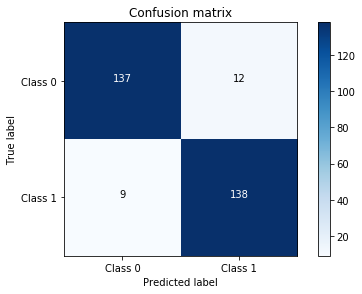

Recall:  0.9387755102040817
Precision:  0.92


In [26]:
# Define the best parameter settings
# best_params = {'C': 10, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 10, 'coef0': 1.0}
best_params = {'C': 8, 'coef0': 0.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

# Create an instance of the SVM classifier with the best parameter settings
clf = SVC(**best_params)
# Fit the classifier on the training data
clf.fit(X_train_undersample, y_train_undersample)

# Make predictions on the test data
y_pred = clf.predict(X_test_undersample)

# Compute the confusion matrix
cm = confusion_matrix(y_test_undersample, y_pred)

# Define the class labels
classes = ['Class 0', 'Class 1']  # Update with your actual class labels

# Call the plot_confusion_matrix function
plot_confusion_matrix(cm, classes)

# Show the plot
plt.show()

print("Recall: ", cm[1,1]/(cm[1,0]+cm[1,1]))
print("Precision: ", cm[1,1]/(cm[1,1]+cm[0,1]))

Recall:  0.9659863945578231
Precision:  0.02342461233916199


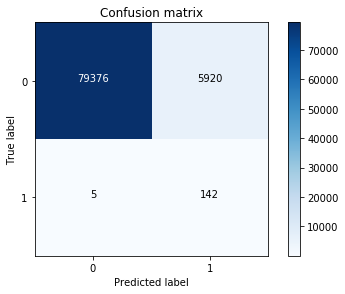

In [10]:
# Create an instance of the SVM classifier with the best parameter settings
svm = SVC(**best_params)

# Fit the classifier on the undersampled training data
svm.fit(X_train_undersample, y_train_undersample.values.ravel())

# Make predictions on the test data
y_pred = svm.predict(X_test.values)

# Compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Calculate recall and precision from the confusion matrix
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1])
precision = cnf_matrix[1, 1] / (cnf_matrix[0, 1] + cnf_matrix[1, 1])

# Print recall and precision
print("Recall: ", recall)
print("Precision: ", precision)

# Set the class names for the confusion matrix plot
class_names = [0, 1]

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [28]:
# Using SMOTE Strategy
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [29]:
credit_cards_copy = data.copy()
columns = credit_cards_copy.columns
features_columns = columns.delete(len(columns)-1)
attributes = credit_cards_copy[features_columns]
label = credit_cards_copy['Class']

In [30]:
features_train, features_test, labels_train, labels_test = train_test_split(attributes, label, test_size = 0.3, random_state = 0)

In [31]:
#Initialize SMOTE model
oversampler=SMOTE(random_state=0)
# Create new data set using SMOTE method
os_features,os_labels=oversampler.fit_resample(features_train,labels_train)

In [32]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, recall_score
from sklearn.svm import SVC

In [15]:
from sklearn.model_selection import StratifiedKFold

# Create an instance of the SVM classifier
clf = SVC()

# Define the parameter grid to search over
param_grid = {
    'C': [1, 5, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Define the scoring metrics to be used in cross-validation
scoring = ['accuracy', 'recall']

# Create a StratifiedKFold instance for k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Create a GridSearchCV instance
grid_search = GridSearchCV(clf, param_grid, scoring=scoring, refit='recall', cv=cv, verbose=3)


grid_search.fit(os_features, os_labels)

# Print the best parameter settings
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=1, gamma=scale, kernel=rbf; accuracy: (test=1.000) recall: (test=1.000) total time=17.8min
[CV 2/5] END C=1, gamma=scale, kernel=rbf; accuracy: (test=1.000) recall: (test=1.000) total time= 7.4min
[CV 3/5] END C=1, gamma=scale, kernel=rbf; accuracy: (test=1.000) recall: (test=1.000) total time= 3.3min
[CV 4/5] END C=1, gamma=scale, kernel=rbf; accuracy: (test=1.000) recall: (test=1.000) total time= 8.0min
[CV 5/5] END C=1, gamma=scale, kernel=rbf; accuracy: (test=1.000) recall: (test=1.000) total time=16.3min
[CV 1/5] END C=1, gamma=scale, kernel=poly; accuracy: (test=0.940) recall: (test=0.883) total time=57.6min
[CV 2/5] END C=1, gamma=scale, kernel=poly; accuracy: (test=0.939) recall: (test=0.880) total time=22.6min
[CV 3/5] END C=1, gamma=scale, kernel=poly; accuracy: (test=0.940) recall: (test=0.882) total time=50.8min
[CV 4/5] END C=1, gamma=scale, kernel=poly; accuracy: (test=0.940) recall: (test=0.881) 

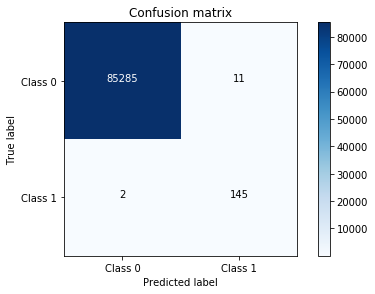

Recall:  0.9863945578231292
Precision:  0.9294871794871795


In [33]:


best_params = {'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale'}

# Create an instance of the SVM classifier with the best parameter settings
clf = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])

# Fit the classifier on the data
clf.fit(os_features, os_labels)

# Make predictions on the entire dataset
y_pred = clf.predict(features_test)

# Compute the confusion matrix
cm = confusion_matrix(labels_test, y_pred)

# Define the class labels
classes = ['Class 0', 'Class 1']  # Update with your actual class labels

# Call the plot_confusion_matrix function
plot_confusion_matrix(cm, classes)

# Show the plot
plt.show()

print("Recall: ", cm[1,1]/(cm[1,0]+cm[1,1]))

print("Precision: ", cm[1,1]/(cm[1,1]+cm[0,1]))

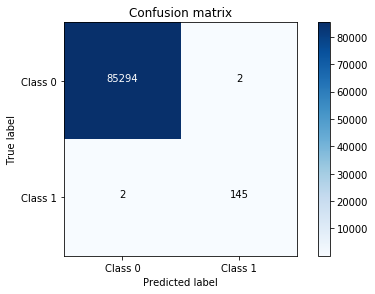

Recall:  0.9863945578231292
Recision:  0.9863945578231292


In [17]:
best_params = {'C': 10, 'kernel': 'rbf', 'gamma': 'scale'}

# Create an instance of the SVM classifier with the best parameter settings
clf = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])

# Fit the classifier on the data
clf.fit(os_features, os_labels)

# Make predictions on the entire dataset
y_pred = clf.predict(features_test)

# Compute the confusion matrix
cm = confusion_matrix(labels_test, y_pred)

# Define the class labels
classes = ['Class 0', 'Class 1']  # Update with your actual class labels

# Call the plot_confusion_matrix function
plot_confusion_matrix(cm, classes)

# Show the plot
plt.show()

print("Recall: ", cm[1,1]/(cm[1,0]+cm[1,1]))

print("Recision: ", cm[1,1]/(cm[1,1]+cm[0,1]))